In [1]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\serge\AppData\Local\Temp\ipykernel_6972\1399112611.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\serge\AppData\Local\Temp\ipykernel_6972\1399112611.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
# Prepare full_path for the data source
#path = "F:/"
#path = "\F:Certicates\IBM_DataScience_230405\Certicates\Courses\Course_10_Capstone\10_projects_labs\"
path = "F:/Certicates/IBM_DataScience_230405/Certicates/Courses/Course_10_Capstone/10_projects_labs/"
filename = "spacex_launch_dash.csv"
full_path = path + filename
print(full_path)

F:/Certicates/IBM_DataScience_230405/Certicates/Courses/Course_10_Capstone/10_projects_labs/spacex_launch_dash.csv


In [3]:
# Read the airline data into pandas dataframe
#spacex_df = pd.read_csv("spacex_launch_dash.csv")
spacex_df = pd.read_csv(filename)
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [4]:
spacex_df.describe()

,Unnamed: 0,Flight Number,class,Payload Mass (kg)
count,56.000000,56.000000,56.000000,56.000000
mean,27.500000,28.500000,0.428571,3696.648214
std,16.309506,16.309506,0.499350,2568.509679
min,0.000000,1.000000,0.000000,0.000000
25%,13.750000,14.750000,0.000000,2121.000000
50%,27.500000,28.500000,0.000000,3412.500000
75%,41.250000,42.250000,1.000000,5042.500000
max,55.000000,56.000000,1.000000,9600.000000


In [5]:
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()
print('Max Payload: ',max_payload)
print('Min Payload: ',min_payload)

Max Payload:  9600.0
Min Payload:  0.0


(array([2., 1., 6., 1., 0., 0., 1., 0., 0., 1., 2., 5., 2., 1., 1., 0., 3.,
        2., 3., 3., 0., 1., 1., 3., 2., 1., 0., 3., 1., 1., 0., 2., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([   0.,  192.,  384.,  576.,  768.,  960., 1152., 1344., 1536.,
        1728., 1920., 2112., 2304., 2496., 2688., 2880., 3072., 3264.,
        3456., 3648., 3840., 4032., 4224., 4416., 4608., 4800., 4992.,
        5184., 5376., 5568., 5760., 5952., 6144., 6336., 6528., 6720.,
        6912., 7104., 7296., 7488., 7680., 7872., 8064., 8256., 8448.,
        8640., 8832., 9024., 9216., 9408., 9600.]),
 <BarContainer object of 50 artists>)

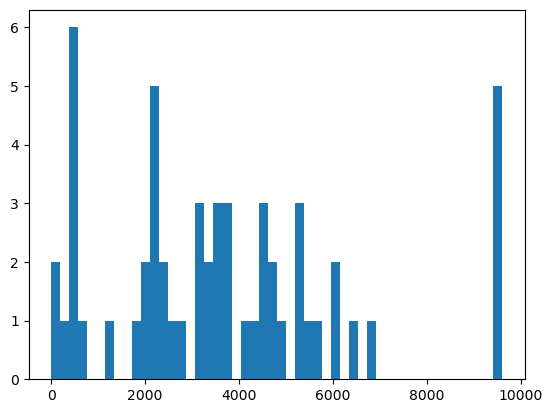

In [6]:
import matplotlib.pyplot as plt
plt.hist(spacex_df['Payload Mass (kg)'], bins = 50)

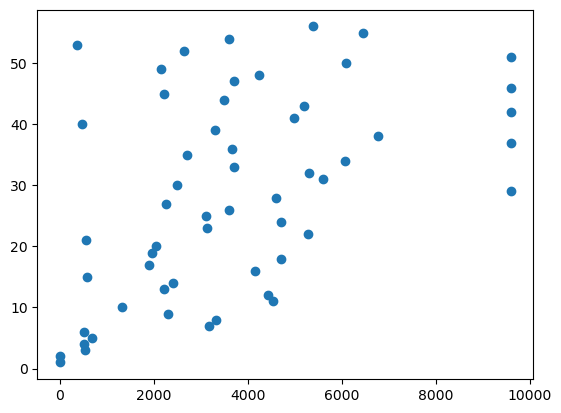

In [7]:
x = spacex_df['Payload Mass (kg)']
y = spacex_df['Flight Number']
plt.scatter(x,y)
#plt.show()

In [8]:
# Create a dash application
app = dash.Dash(__name__)

In [9]:
# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                            options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                            ],
                                            value='ALL',
                                            placeholder="Select a Launch Site here",
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
                                                value=[min_payload, max_payload]),
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

In [10]:
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches By Site')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        filtered_df = filtered_df.groupby(['Launch Site', 'class']).size().reset_index(name='class count')
        fig = px.pie(filtered_df, values='class count', 
        names='class',
        title=f'Total Success Launched for site {entered_site}')
        return fig


In [11]:
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), 
              Input(component_id='payload-slider', component_property='value')])
def get_scatter_chart(entered_site, payload):
    low, high = payload
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)]       
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', 
        color='Booster Version Category',
        title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        fig = px.scatter(filtered_df[filtered_df['Launch Site'] == entered_site],
        x='Payload Mass (kg)', y='class',
        color='Booster Version Category',
        title=f'Correlation between Payload and Success for site {entered_site}')
        return fig

In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [23/May/2023 19:01:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 304 -
127.0.0.1 - - [23/May/2023 19:01:53] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [23/May/2023 19:01:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:01:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:12:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/May/2023 19:12:04] "GET /_dash-layout HTTP/1.1" 200 -
127.